In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sales = pd.read_excel("EDNA2.xlsx", sheet_name=0)
sales.head()

,Date,ID,Customer Name,Product ID,Product,Sales Value
0,2019-04-06,C258,Daniel Perry,281914369-5,Web Hosting,760
1,2019-11-10,C212,Wayne Gardner,271951398-9,Power BI Consulting,610
2,2019-10-20,C177,Todd Watson,788959641-3,Networking,916
3,2019-06-19,C191,Nicholas Ward,094714157-X,Consulting,123
4,2019-12-09,C144,Louis Johnston,094714157-X,Consulting,104


In [4]:
email = pd.read_excel("EDNA2.xlsx", sheet_name=1)
email.head()

,Date,ID,Customer Name,Email Received,Email Opened,Link Clicked
0,2019-09-29,C068,Todd Davis,True,False,False
1,2019-12-25,C026,Jerry Green,False,False,False
2,2019-09-30,C109,Craig Reyes,True,True,False
3,2019-09-10,C169,Johnny Butler,False,False,False
4,2019-01-26,C100,Steve Wells,False,False,False


In [5]:
print(sales.shape)
print(email.shape)

(10000, 6)
(8368, 6)


In [6]:
sales.isnull().sum()

Date             0
ID               0
Customer Name    0
Product ID       0
Product          0
Sales Value      0
dtype: int64

In [7]:
email.isnull().sum()

Date              0
ID                0
Customer Name     0
Email Received    0
Email Opened      0
Link Clicked      0
dtype: int64

In [8]:
sales.dtypes

Date             datetime64[ns]
ID                       object
Customer Name            object
Product ID               object
Product                  object
Sales Value               int64
dtype: object

In [9]:
email.dtypes

Date              datetime64[ns]
ID                        object
Customer Name             object
Email Received              bool
Email Opened                bool
Link Clicked                bool
dtype: object

In [10]:
sales["Sales Value"].describe()

count    10000.000000
mean       511.468300
std        281.820659
min         20.000000
25%        270.000000
50%        513.000000
75%        754.000000
max       1000.000000
Name: Sales Value, dtype: float64

In [11]:
#Summary of Sales
print("Total Sales: " + str(sales["Sales Value"].sum()))
print("Total Number of Customers: " + str(sales["Customer Name"].nunique()))
print("Total Number of Sales Orders: " + str(len(sales)))
print("Number of Products Offered: " + str(sales["Product"].nunique()))

Total Sales: 5114683
Total Number of Customers: 263
Total Number of Sales Orders: 10000
Number of Products Offered: 10


In [12]:
#Segmenting
emails_received = email[email["Email Received"]==True]
emails_opened = email[email["Email Opened"]==True]
link_clicked = email[email["Link Clicked"]==True]

In [13]:
emails_sent_sum = len(email)
emails_received_sum = len(emails_received)
emails_opened_sum = len(emails_opened)
link_clicked_sum = len(link_clicked)

print("Emails Sent: " + str(emails_sent_sum))
print("Emails Received: " + str(emails_received_sum))
print("Emails Opened: " + str(emails_opened_sum))
print("Link Clicked: " + str(link_clicked_sum))

Emails Sent: 8368
Emails Received: 4156
Emails Opened: 2054
Link Clicked: 1038


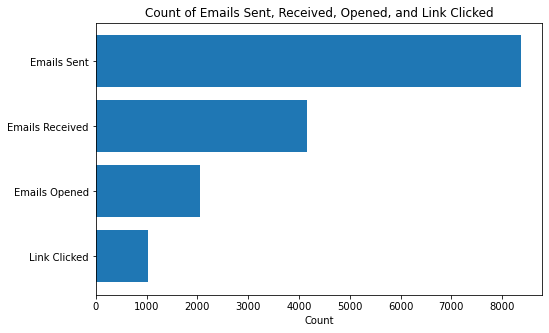

In [14]:
x = ["Emails Sent","Emails Received","Emails Opened","Link Clicked"]
y = [emails_sent_sum, emails_received_sum, emails_opened_sum, link_clicked_sum]

plt.figure(figsize = (8,5))
plt.barh(x,y)
plt.title("Count of Emails Sent, Received, Opened, and Link Clicked")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

In [15]:
#Email Metrics
print("Email Open Rate: " + str(round(emails_opened_sum/emails_sent_sum*100,1)) + "%")
print("CTR: " + str(round(link_clicked_sum/emails_sent_sum*100,1)) + "%")

Email Open Rate: 24.5%
CTR: 12.4%


In [16]:
#Identify customer with highest sales
customer_sales = sales[["Customer Name","Sales Value"]]
customer_sales = customer_sales.groupby(["Customer Name"]).sum()
name = customer_sales.idxmax()
customer_sales.loc[name]

,Sales Value
Customer Name,
Justin Butler,32348


In [17]:
print("Customer with highest sales: " + str(customer_sales.idxmax()[0]))
print("Sales: " + str(int(customer_sales.loc[name].values)))

Customer with highest sales: Justin Butler
Sales: 32348


In [18]:
#Customer with the most emails sent, received, opened, link clicked, open rate, CTR
emails_sent_max = email.groupby(["Customer Name"]).count()
print("Customers with most emails sent: " + str(emails_sent_max.idxmax()[0]))

emails_received_max = emails_received.groupby(["Customer Name"]).count()
emails_received_max = emails_received_max[["Email Received"]]
print("Customers with most emails received: " + str(emails_received_max.idxmax()[0]))

emails_opened_max = emails_opened.groupby(["Customer Name"]).count()
emails_opened_max = emails_opened_max[["Email Opened"]]
print("Customer with most emails opened: " + str(emails_opened_max.idxmax()[0]))

link_clicked_max = link_clicked.groupby(["Customer Name"]).count()
link_clicked_max = link_clicked_max[["Link Clicked"]]
print("Customers with most links clicked: " + str(link_clicked_max.idxmax()[0]))

Customers with most emails sent: Johnny Butler
Customers with most emails received: Dennis Morris
Customer with most emails opened: Bruce Harris
Customers with most links clicked: Dennis Morris


In [19]:
#Product with the highest sales value
product_sales = sales[["Product","Sales Value"]]
product_sales = product_sales.groupby(["Product"]).sum()
name = product_sales.idxmax()
product_sales.loc[name]

,Sales Value
Product,
Networking,545656


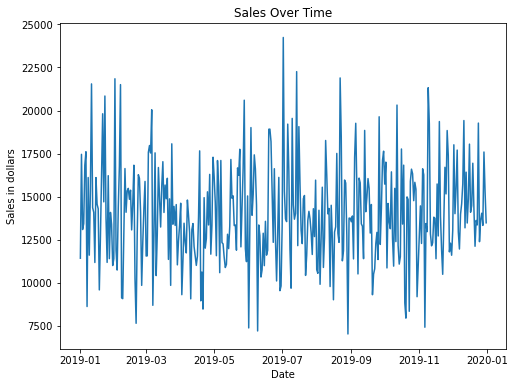

In [20]:
daily_sales = sales.groupby(["Date"])[["Sales Value"]].sum()

plt.figure(figsize = (8,6))
plt.plot(daily_sales["Sales Value"])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales in dollars")
plt.show()

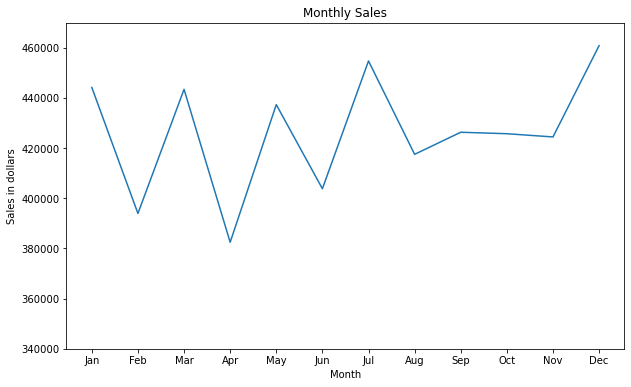

In [21]:
data = {"Month No": [1,2,3,4,5,6,7,8,9,10,11,12],
       "Month": ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]}
month = pd.DataFrame(data)
month.set_index("Month No", inplace=True)

monthly_sales = sales.copy()
monthly_sales["Month No"] = monthly_sales["Date"].dt.month
monthly_sales = monthly_sales.groupby(["Month No"])[["Sales Value"]].sum()
monthly_sales = monthly_sales.merge(month,on="Month No")
monthly_sales = monthly_sales.set_index("Month")

plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set(ylim = (340000,470000))
plt.plot(monthly_sales["Sales Value"])
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales in dollars")
plt.show()

In [22]:
#Monthly sales by product
monthly_sales = sales.copy()
monthly_sales["Month No"] = monthly_sales["Date"].dt.month
monthly_sales = monthly_sales.groupby(["Month No","Product"])["Sales Value"].sum().unstack()
monthly_sales

Product,AWS Consulting,Azure Consulting,Consulting,Element Training,Financial Reporting,Linux Consulting,Networking,Power BI Consulting,Web Design,Web Hosting
Month No,,,,,,,,,,
1,52920,38714,31451,52925,44316,45290,54419,35266,45202,43663
2,37920,33391,35774,39878,46185,40804,39342,39991,41818,38847
3,46712,48889,42288,45158,49123,35078,46583,47959,41476,40145
4,41511,33430,37846,32292,46032,38125,33007,36450,39774,44005
5,43338,44561,51781,40513,48972,39533,49970,48984,37288,32380
6,36075,32209,36952,39960,44617,23834,47765,40530,46438,55426
7,46628,58149,30846,46234,51505,45685,44239,40519,42779,48145
8,40755,41036,38299,33345,44206,49674,50561,37540,46603,35492
9,37011,51301,39853,32944,39615,42850,50241,45863,45475,41160


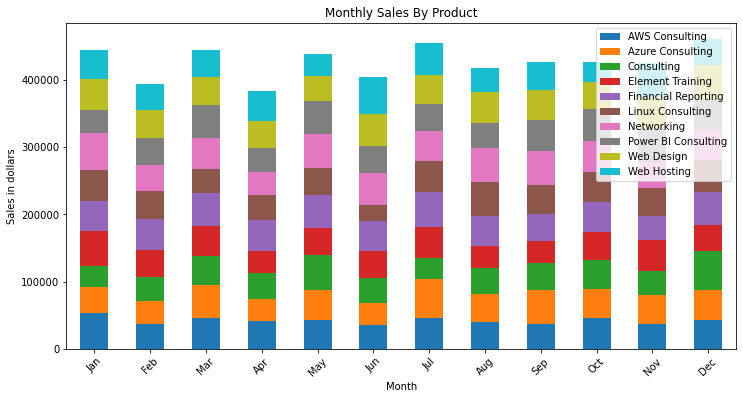

In [23]:
#Monthly sales by product
monthly_sales = sales.copy()
monthly_sales["Month No"] = monthly_sales["Date"].dt.month
monthly_sales = monthly_sales.groupby(["Month No","Product"])["Sales Value"].sum().unstack()
label = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

fig, ax = plt.subplots(figsize=(12,6))
monthly_sales.plot(kind = "bar",stacked = True, ax = ax)
ax.set_title("Monthly Sales By Product")
ax.set_xlabel("Month")
ax.set_ylabel("Sales in dollars")
ax.legend(loc="upper right")
ax.set_xticklabels(label, rotation = 45)
plt.show()

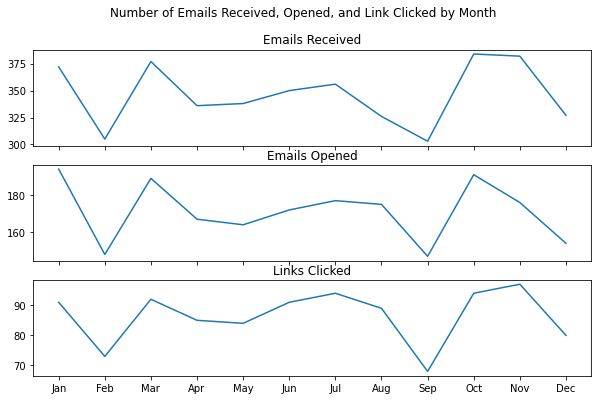

In [24]:
#Line chart of emails received, opened, and link clicked by month
monthly_received = emails_received.copy()
monthly_received["Month No"] = monthly_received["Date"].dt.month
monthly_received = monthly_received.groupby(["Month No"]).count()
monthly_received["Month"] = month
monthly_received = monthly_received[["Month","Email Received"]]

monthly_opened = emails_opened.copy()
monthly_opened["Month No"] = monthly_opened["Date"].dt.month
monthly_opened = monthly_opened.groupby(["Month No"]).count()
monthly_opened = monthly_opened[["Email Opened"]]
monthly_all = monthly_received.merge(monthly_opened,on="Month No")

monthly_clicks = link_clicked.copy()
monthly_clicks["Month No"] = monthly_clicks["Date"].dt.month
monthly_clicks = monthly_clicks.groupby(["Month No"]).count()
monthly_clicks = monthly_clicks[["Link Clicked"]]
monthly_all = monthly_all.merge(monthly_clicks,on="Month No")

monthly_all=monthly_all.set_index("Month")

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, figsize = (10,6))
fig.suptitle("Number of Emails Received, Opened, and Link Clicked by Month")
ax1.plot(monthly_all["Email Received"])
ax1.set_title("Emails Received")
ax2.plot(monthly_all["Email Opened"])
ax2.set_title("Emails Opened")
ax3.plot(monthly_all["Link Clicked"])
ax3.set_title("Links Clicked")
plt.show()

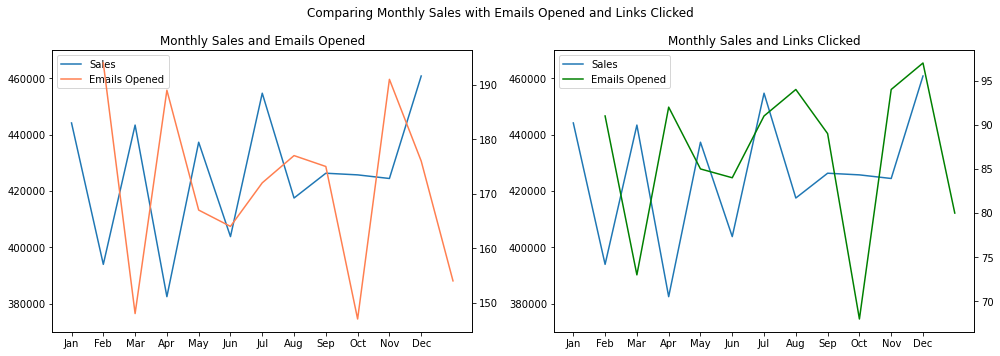

In [25]:
#Set monthly sales
monthly_sales = sales.copy()
monthly_sales["Month No"] = monthly_sales["Date"].dt.month
monthly_sales = monthly_sales.groupby(["Month No"])[["Sales Value"]].sum()
monthly_sales["Month"] = month
monthly_sales = monthly_sales.set_index("Month")

#Monthly sales and emails opened vs. sales and link clicked
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))
fig.suptitle("Comparing Monthly Sales with Emails Opened and Links Clicked")

chart1 = ax1.plot(monthly_sales["Sales Value"],label="Sales")
ax1.set_title("Monthly Sales and Emails Opened")
ax1.set(ylim = (370000,470000))
ax3 = ax1.twinx()
chart3 = ax3.plot(monthly_opened["Email Opened"],color="coral",label="Emails Opened")

chart2 = ax2.plot(monthly_sales["Sales Value"],label="Sales")
ax2.set_title("Monthly Sales and Links Clicked")
ax2.set(ylim = (370000,470000))
ax4 = ax2.twinx()
chart4 = ax4.plot(monthly_clicks["Link Clicked"], color = "green",label="Links Clicked")

total_charts = chart1 + chart3
labels = [c.get_label() for c in total_charts]
total_charts2 = chart2 + chart4
labels2 = [c.get_label() for c in total_charts]

ax1.legend(total_charts, labels, loc="upper left")
ax2.legend(total_charts2, labels2, loc="upper left")
fig.tight_layout()
plt.show()

In [26]:
#Relationship between sales and emails
combined = email.merge(sales, on=["Date","ID","Customer Name"])
combined = combined.replace({True:1,False:0})
combined.head()

,Date,ID,Customer Name,Email Received,Email Opened,Link Clicked,Product ID,Product,Sales Value
0,2019-12-17,C016,Phillip Peters,0,0,0,094714157-X,Consulting,280
1,2019-12-17,C016,Phillip Peters,1,1,1,094714157-X,Consulting,280
2,2019-04-02,C189,Ryan Taylor,0,0,0,941254104-X,Element Training,113
3,2019-09-16,C018,Benjamin Kim,1,1,1,281914369-5,Web Hosting,630
4,2019-09-11,C139,Russell Bailey,0,0,0,281914369-5,Web Hosting,48


In [31]:
combined_grouped = combined.groupby(["Date","ID"])[["Email Received","Email Opened","Link Clicked","Sales Value"]].sum()
combined_grouped = combined_grouped.reset_index()
combined_grouped.head()

,Date,ID,Email Received,Email Opened,Link Clicked,Sales Value
0,2019-01-01,C078,1,0,0,82
1,2019-01-01,C233,1,0,0,53
2,2019-01-02,C148,1,0,0,56
3,2019-01-02,C200,0,0,0,89
4,2019-01-02,C204,1,1,1,880


In [32]:
combined_group2 = combined_grouped[["Email Received","Email Opened","Link Clicked","Sales Value"]]
combined_group2.corr()

,Email Received,Email Opened,Link Clicked,Sales Value
Email Received,1.000000,0.592412,0.369322,0.083162
Email Opened,0.592412,1.000000,0.635995,0.039116
Link Clicked,0.369322,0.635995,1.000000,0.025152
Sales Value,0.083162,0.039116,0.025152,1.000000


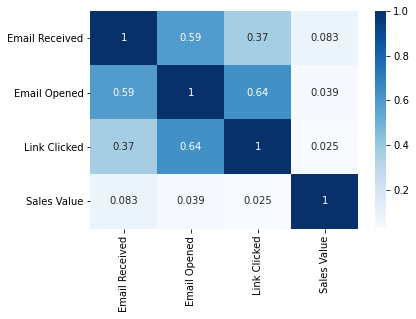

In [33]:
sns.heatmap(combined_group2.corr(), annot = True, cmap="Blues")
plt.show()

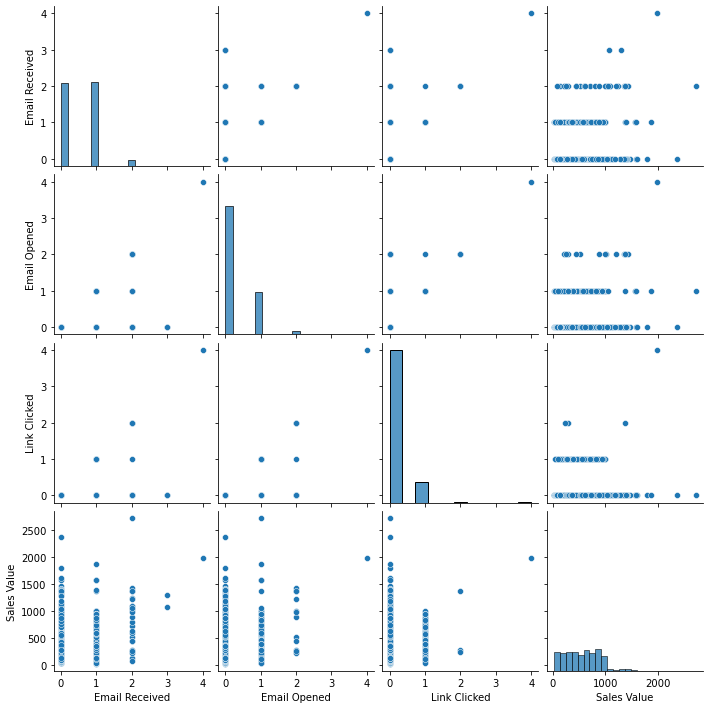

In [34]:
sns.pairplot(combined_group2)
plt.show()